In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns

In [16]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"],index_col="date") #Set the index to the "date" column.
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [17]:
#https://www.w3resource.com/pandas/dataframe/dataframe-quantile.php
df = df[(df["value"] >= df["value"].quantile(0.025)) & 
(df["value"] <= df["value"].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


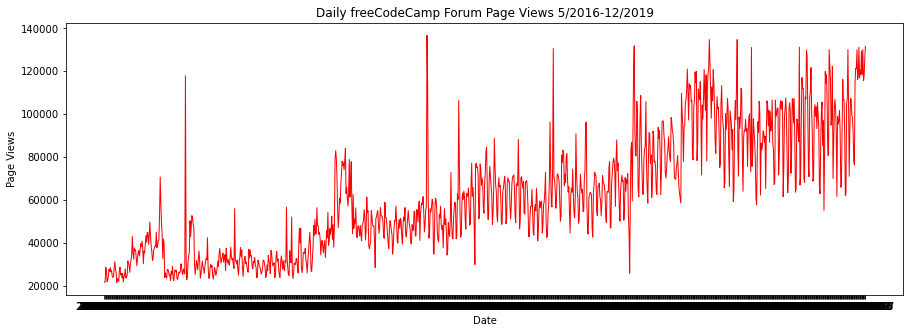

In [15]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df.index, df['value'], color='red', linewidth=1)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
plt.show()

In [22]:
df["month"] = df.index.month #we parse the data when the csv file was readed   
df["year"] = df.index.year
df

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [25]:
df_bar = df.groupby(["year", "month"])["value"].mean()
df_bar

year  month
2016  5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

In [26]:
df_bar = df_bar.unstack()
df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


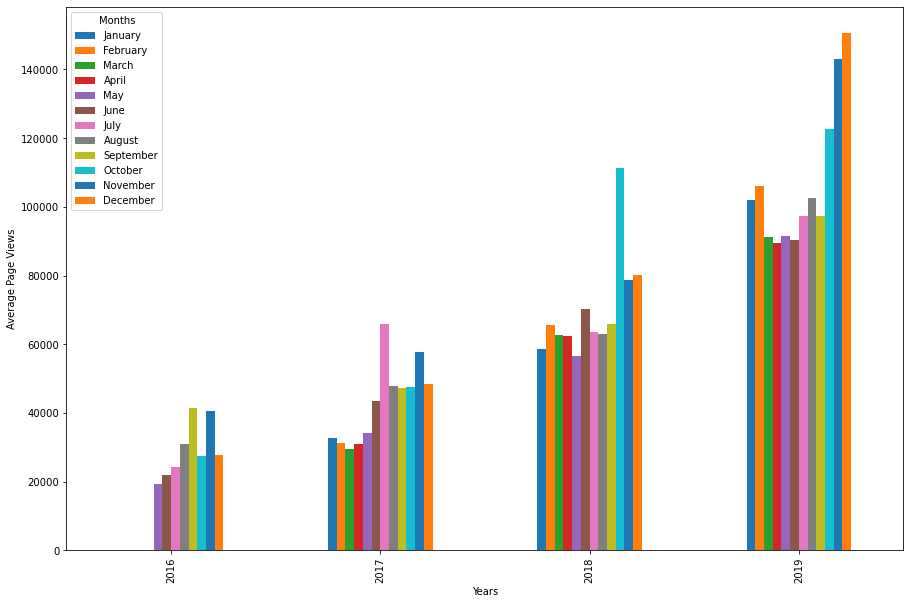

In [35]:
fig = df_bar.plot(kind = "bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years", fontsize= 10)
plt.ylabel("Average Page Views", fontsize= 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

In [45]:
df_box = df.copy()
df_box 

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [46]:
df_box.reset_index(inplace=True)
df_box

,date,value,month,year
0,2016-05-19,19736,5,2016
1,2016-05-26,18060,5,2016
2,2016-05-27,19997,5,2016
3,2016-05-28,19044,5,2016
4,2016-05-29,20325,5,2016
...,...,...,...,...
1233,2019-11-24,138875,11,2019
1234,2019-11-29,171584,11,2019
1235,2019-11-30,141161,11,2019
1236,2019-12-01,142918,12,2019


In [51]:
df_box["year"] = [d.year for d in df_box.date]
df_box["month"] = [d.strftime('%b') for d in df_box.date]
df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")
df_box

,date,value,month,year,month_num
210,2017-01-06,37353,Jan,2017,1
937,2019-01-06,94108,Jan,2019,1
936,2019-01-05,77897,Jan,2019,1
935,2019-01-04,94514,Jan,2019,1
934,2019-01-03,100710,Jan,2019,1
...,...,...,...,...,...
567,2017-12-29,72819,Dec,2017,12
566,2017-12-28,51018,Dec,2017,12
565,2017-12-27,43075,Dec,2017,12
201,2016-12-28,28424,Dec,2016,12


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)

ax1 = sns.boxplot(x=df_box["year"], y=df_box["value"], ax=ax1)
ax1.set_title("Year-wise Box Plot (Trend)") 
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

ax2 = sns.boxplot(x=df_box["month"], y=df_box["value"], ax=ax2)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')

plt.show()